In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

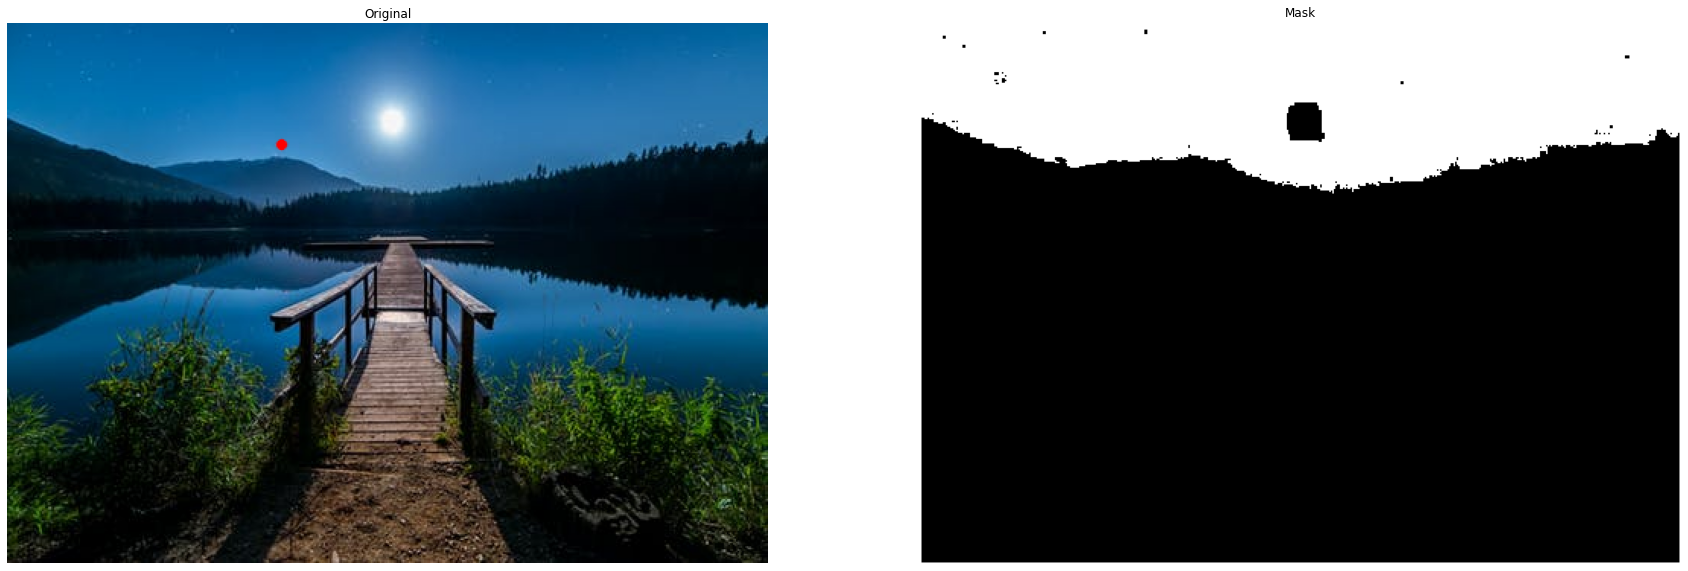

In [7]:
src=cv2.imread('./data/bridge.jpg')
srcrgb=cv2.cvtColor(src,cv2.COLOR_BGR2RGB)
mask=np.zeros((src.shape[0]+2,src.shape[1]+2),np.uint8)

seed=(180,80)
newVal=255 # 분할된 영역은 255로 채움 
loDiff, upDiff = (5,5,5),(5,5,5) # 채널별로 시드보다 5를 뺀 수, 채널별로 시드보다 5를 더한 수 수

floodflags=cv2.FLOODFILL_MASK_ONLY
cv2.floodFill(src,mask,seedPoint=seed,newVal=newVal, loDiff=loDiff, upDiff=upDiff)
cv2.circle(srcrgb,seed,3,(255,0,0),cv2.FILLED,cv2.LINE_AA);

plt.figure(figsize=(30,30))
image1=plt.subplot(1,2,1)
image1.set_title('Original')
plt.axis('off')
plt.imshow(srcrgb)

image1=plt.subplot(1,2,2)
image1.set_title('Mask')
plt.axis('off')
plt.imshow(mask,cmap='gray')

In [11]:
src2=cv2.imread("./data/duck.png")
mask=np.zeros((src2.shape[0]+2,src2.shape[1]+2),np.uint8)

newVal=(0,0,255)
def onMouse(event,x,y,flags,param):
    if event==cv2.EVENT_LBUTTONDOWN:
        seed=(x,y)
        retval=cv2.floodFill(src2,mask,seed,newVal=newVal, loDiff=loDiff, upDiff=upDiff)
        cv2.imshow('src2',src2)
cv2.imshow('src2',src2)
cv2.setMouseCallback('src2',onMouse)
cv2.waitKey(0)
cv2.destroyAllWindows()